# DMQC Report: WMO 4900879

## Current status and metadata: 

- APEX float deployed in the Northern Lab Sea, working its way around and down to the central North Atlantic / Scotia Shelf
- Completed 150 cycles from May 2006 to 2010
- Data currently in A mode, adjustment applied by Henry Bittig
- Mean gain of 1.0663

In [2]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.dates import datestr2num
import matplotlib.pyplot as plt

from netCDF4 import Dataset

from pathlib import Path
import numpy as np
import pandas as pd
import bgcArgoDMQC as bgc

wmo = 4900879 # insert WMO number here
fig_path = Path('../../../figures/') / f'{wmo}' # where to save figures
fig_path.mkdir(exist_ok=True)
bgc.io.get_argo(wmo, local_path=bgc.io.Path.ARGO_PATH) # download the data to ensure you have up to date files
flt = bgc.sprof(wmo)
flt.clean()
gains = flt.calc_gains(ref='WOA') # calculate gain, can change to ref='NCEP' if in-air data is available
print(np.nanmean(gains))


\Users\GordonC\Documents\data\Argo\dac\meds\4900879\4900879_Rtraj.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4900879\4900879_Sprof.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4900879\4900879_meta.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4900879\4900879_prof.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4900879\4900879_tech.nc
Extracting WOA data for Jan
Extracting WOA data for Feb
Extracting WOA data for Mar
Extracting WOA data for Apr
Extracting WOA data for May
Extracting WOA data for Jun
Extracting WOA data for Jul
Extracting WOA data for Aug
Extracting WOA data for Sep
Extracting WOA data for Oct
Extracting WOA data for Nov
Extracting WOA data for Dec
Bounding climatological profile(s) missing data - taking simple average of available data.
Bounding climatological profile(s) missing data - taking simple average of available data.
Bounding climatological profile(s) missing data - taking simple average of available data.
Bounding climatological profile(s) missing data -

In [5]:

# check what/if anything is done already
nc = Dataset(flt.__Sprof__)
print(bgc.io.read_ncstr(nc['SCIENTIFIC_CALIB_COMMENT'][:][0,-1,-1,:]))
print(nc['DOXY_ADJUSTED'][:][-1,:]/nc['DOXY'][:][-1,:])
print(np.nanmean(nc['DOXY_ADJUSTED'][:]/nc['DOXY'][:]))
nc.close()

by Henry Bittig; ORCID 0000-0002-8621-3095; after Bittig et al. (2018) eq. 23 T-dependent slope on PPOX_DOXY with linear time trend in slope; Using in-air obs; No time response correction done; error gives 1 sigma
[1.0249289274215698 1.0249452590942383 1.0292706489562988
 1.0303688049316406 1.033305048942566 1.034449815750122 1.0352152585983276
 1.0360063314437866 1.0368579626083374 1.037362813949585 1.037644386291504
 1.0379397869110107 1.0381724834442139 1.0384306907653809
 1.0388611555099487 1.039063572883606 1.039293885231018 1.0393754243850708
 1.0395499467849731 1.039715051651001 1.0398825407028198
 1.0399826765060425 1.0400826930999756 1.0402060747146606
 1.0403223037719727 1.040527105331421 1.0406574010849 1.0408644676208496
 1.0408226251602173 1.0410552024841309 1.0414832830429077
 1.0419464111328125 1.042351245880127 1.0425350666046143
 1.0426815748214722 1.0429282188415527 1.0431772470474243
 1.0436099767684937 1.0440822839736938 1.0459622144699097
 1.0486379861831665 1.0504

## Visual QC

- Visualize the float and reference surface saturations, as well as the profiles. 
- Observe if DOXY data is set to '3' as it should be or if it is '1' or '2'. 
- Try to note cycles or other identifying features of potentially problematic profiles.

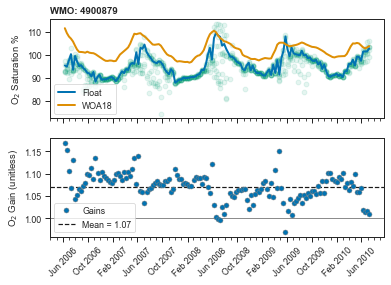

In [6]:
g = flt.plot('gain', ref='WOA')
g.axes[0].set_title(f'WMO: {wmo}', loc='left', fontweight='bold')
g.axes[0].plot(flt.df.SDN.loc[flt.df.PRES < 50], flt.df.O2Sat.loc[flt.df.PRES < 50], 'o', zorder=0, alpha=0.1)
g.fig.savefig(fig_path / 'gain_initial.png', bbox_inches='tight', dpi=250)

Figure 1: Top panel: Float oxygen percent saturation (blue line) compared to WOA percent saturation (orange line), with DOXY audit flagged cycle percent saturation (green stars, if applicable) and raw float percent saturation (orange circles). Bottom panel: calculated gains (blue dots) and flagged gains from DOXY audit (orange stars).

Notes: [notes on what this figure tells you here] 

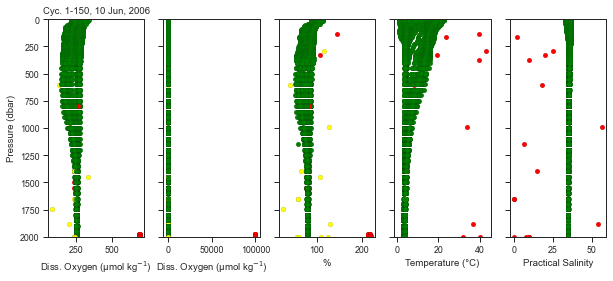

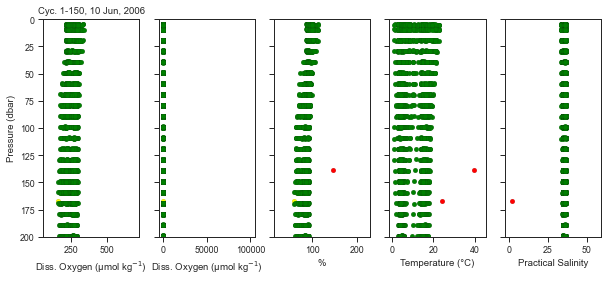

In [7]:
flt.reset()
g = flt.plot('qcprofiles', varlist=['DOXY', 'DOXY_ADJUSTED', 'O2Sat', 'TEMP', 'PSAL'])
g.fig.savefig(fig_path / 'qcprofiles.png', bbox_inches='tight', dpi=250)
g = flt.plot('qcprofiles', varlist=['DOXY', 'DOXY_ADJUSTED', 'O2Sat', 'TEMP', 'PSAL'])
g.axes[0].set_ylim((200,0))
g.fig.savefig(fig_path / 'qcprofiles_shallow.png', bbox_inches='tight', dpi=250)

Figures 2,3: Profiles coloured by QC flag (1-2, green, 3, yellow, 4, red) on difference depth scales.

Notes: [notes on what this figure tells you here] 

## Flag bad data, recalculate gain

- Using the plots above (and likely some more specific plots, made on a case-by-case basis), flag bad DOXY data as 4. 
- After flagging bad data, re-clean the data and re-calculate the gains.


Calculating gains using WOA surface data and float O2 percent saturation...
1.0715522475607981


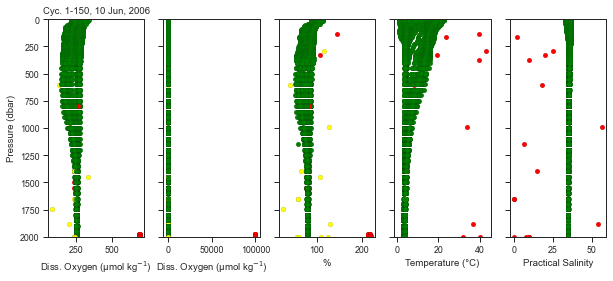

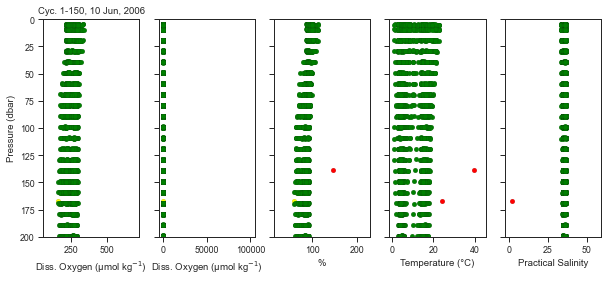

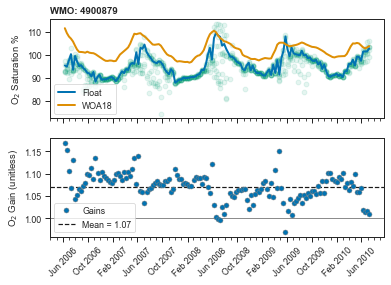

In [8]:
bad_oxygen = [] # index defining where the oxygen should be flagged as bad
flt.update_field('DOXY_QC', 4, where=bad_oxygen)
flt.update_field('DOXY_ADJUSTED_QC', 4, where=bad_oxygen)
flt.clean()
new_gains = flt.calc_gains(ref='WOA')
print(np.nanmean(new_gains))

flt.reset()
g = flt.plot('qcprofiles', varlist=['DOXY', 'DOXY_ADJUSTED', 'O2Sat', 'TEMP', 'PSAL'])
g.fig.savefig(fig_path / 'qcprofiles_postqc.png', bbox_inches='tight', dpi=250)
g = flt.plot('qcprofiles', varlist=['DOXY', 'DOXY_ADJUSTED', 'O2Sat', 'TEMP', 'PSAL'])
g.axes[0].set_ylim((200,0))
g.fig.savefig(fig_path / 'qcprofiles_shallow_postqc.png', bbox_inches='tight', dpi=250)

flt.clean()
g = flt.plot('gain', ref='WOA')
g.axes[0].set_title(f'WMO: {wmo}', loc='left', fontweight='bold')
g.axes[0].plot(flt.df.SDN.loc[flt.df.PRES < 50], flt.df.O2Sat.loc[flt.df.PRES < 50], 'o', zorder=0, alpha=0.1)
g.fig.savefig(fig_path / 'gain_final.png', bbox_inches='tight', dpi=250)

Figure x: Repeated gain plot with bad data removed.

## Update Fields and Export

- DOXY should be 3 by default, but many old floats have 1 or 0. Though it will be redundant in some cases, make sure DOXY_QC is not good.
- Apply the gain to calculate DOXY_ADJUSTED. 
- Fill in DOXY_ADJUSTED_ERROR with an appropriate fixed value.
- Fill in DOXY_ADJUSTED_QC. 
- Make sure DOXY_ADJUSTED and DOXY_ADJUSTED_ERROR are `FillValue` wherever DOXY_ADJUSTED_QC is bad.
- Export the D-mode files. During export, HISTORY parameters will be filled as well as SCIENTIFIC_CALIB parameters using some default structures and user info set by calling `bgc.configure.configure()`.

In [9]:
# make sure DOXY_QC is 3 instead of 0,1,2
flt.update_field('DOXY_QC', 3, where=flt.DOXY_QC.isin([0, 1, 2]))
# fill in DOXY_ADJUSTED_QC appropriately
# flt.update_field('DOXY_ADJUSTED_QC', 4, where=flt.TEMP_ADJUSTED_QC == 4)
# flt.update_field('DOXY_ADJUSTED_QC', 3, where=flt.PSAL_ADJUSTED_QC == 4)
# make sure the data is FillValues where adjusted values are still bad
flt.update_field('DOXY_ADJUSTED_QC', 4, where=flt.DOXY_ADJUSTED.isna())
flt.set_fillvalue('DOXY_ADJUSTED', where=flt.DOXY_ADJUSTED_QC == 4)
flt.set_fillvalue('DOXY_ADJUSTED_ERROR', where=flt.DOXY_ADJUSTED_QC == 4)

In [10]:
# export the files - version for if already in A mode and unchanged
comment = 'by Henry Bittig; ORCID 0000-0002-8621-3095; after Bittig et al. (2018) eq. 23 T-dependent slope on PPOX_DOXY with linear time trend in slope; Using in-air obs; No time response correction done; error gives 1 sigma'
comment += f"; Visual QC by Christopher Gordon (DFO, ORCID {bgc.config['orcid']})"
comment = comment.replace('No time response correction done;', '')
flt.export_files(data_mode='D', comment=comment, coeff='previous', equation='previous')

Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900879/profiles/BD4900879_001.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900879/profiles/BD4900879_002.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900879/profiles/BD4900879_003.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900879/profiles/BD4900879_004.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900879/profiles/BD4900879_005.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900879/profiles/BD4900879_006.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900879/profiles/BD4900879_007.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900879/profiles/BD4900879_008.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900879/profiles/BD4900879_009.nc...done
Working on

In [11]:
# export the files - for R to D mode
# flt.export_files(data_mode='D')

In [13]:
from pathlib import Path
import pandas as pd
from netCDF4 import Dataset
import copy

loc = Path(f'/Users/GordonC/Documents/data/Argo/dac/meds/D/{wmo}/profiles/')
files = pd.read_csv(Path(f'../../../checker/summary/{wmo}/files.txt'))
varname = 'DOXY'
for fn in files.files:
    print(fn)
    nc = Dataset(loc / fn, 'r+')
    print(nc['DOXY'][:])
    flags = copy.deepcopy(nc[varname+'_QC'][:])
    flags[nc[varname][:].mask] = b'9'
    nc[varname+'_QC'][:] = flags
    if varname == 'DOXY':
        flags = copy.deepcopy(nc[varname+'_ADJUSTED_QC'][:])
        flags[nc[varname][:].mask] = b'9'
        nc[varname+'_ADJUSTED_QC'][:] = flags
    profile = copy.deepcopy(nc['PROFILE_DOXY_QC'][:])
    profile[0] = b'A'
    nc['PROFILE_DOXY_QC'][:] = profile
    nc.close()

BD4900879_006.nc
[[284.0411376953125 284.08038330078125 288.59783935546875
  286.5445251464844 285.81390380859375 288.8350524902344
  287.9233093261719 286.31329345703125 285.20062255859375
  284.25482177734375 282.8774108886719 280.7392272949219
  278.2837219238281 275.77642822265625 274.4832763671875
  273.3407287597656 272.96923828125 271.84698486328125 271.3208312988281
  270.8615417480469 270.06085205078125 269.60443115234375
  269.2419128417969 268.9532470703125 268.76544189453125
  268.34393310546875 268.11553955078125 268.1070861816406
  267.828857421875 267.7604064941406 267.8169860839844 267.8721008300781
  267.4714050292969 267.5861511230469 267.47918701171875
  267.5194396972656 267.4015197753906 267.0797119140625 266.5630798339844
  265.33721923828125 263.6535949707031 260.476806640625 257.4872131347656
  255.53021240234375 255.19927978515625 255.53509521484375
  255.50807189941406 255.38059997558594 254.7142791748047
  253.73033142089844 252.91543579101562 252.81559753417

BD4900879_013.nc
[[279.9042053222656 279.90869140625 279.5306701660156 278.2223815917969
  274.1973876953125 271.5926208496094 270.78509521484375
  270.1903991699219 269.2567138671875 268.33319091796875
  267.6781921386719 267.2871398925781 267.1488037109375 267.3548278808594
  267.28369140625 267.7912902832031 268.5451354980469 267.1665954589844
  265.56866455078125 265.3013916015625 265.0482177734375 264.683837890625
  264.59747314453125 264.2405090332031 264.27679443359375
  264.4147033691406 264.5316162109375 265.0963134765625 265.84765625
  266.0005798339844 266.59130859375 266.7727966308594 267.2943115234375
  267.89007568359375 268.1997985839844 268.61212158203125
  269.6675720214844 271.984375 273.0020751953125 273.4021301269531
  271.2923889160156 270.981689453125 270.4203186035156 270.15570068359375
  269.43292236328125 266.892578125 265.15704345703125 263.0202941894531
  261.72222900390625 261.7770080566406 263.0552978515625
  263.85992431640625 262.5668640136719 259.7129211

In [14]:
for fn in Path(f'/Users/GordonC/Documents/data/Argo/dac/meds/D/{wmo}/profiles/').glob('BD*.nc'):
    nc = Dataset(fn, 'r+')
    nc.comment_dmqc_operator = nc.comment_dmqc_operator + f'; DOXY | Christopher Gordon, DFO | ORCID {bgc.config["orcid"]}'
    nc.close()